In [3]:
import numpy as np
import math

def logistic_function(z, k=5):
    """Calculates the logistic function.

    Args:
        z: Input value or array.
        k: Parameter controlling the steepness of the curve (default: 5).

    Returns:
        The result of the logistic function.
    """
    return 1 / (1 + np.exp(-k * (z - 0.5)))

def generalized_logistic(z, A, K, B, C, M):
    """Calculates the generalized logistic function.
        
    Args:
        z: Input value or array.
        A: Lower asymptote 
        K: Upper asymptote
        B: Growth rate
        C: Affects near which asymptote maximum growth occurs
        M: Time of maximum growth

     Returns:
        The result of the generalized logistic function.
    """
    return A + (K - A) / (1 + np.exp(-B * (z - M)))**C

def error_function(z):
    """Approximates the error function (erf) using a numerical method.
    Note: Consider using scipy.special.erf for a more accurate implementation. 
    """
    return (2 / np.sqrt(np.pi)) * np.trapz(np.exp(-z**2), x=None, dx=1e-3, axis=-1) 


/tmp/ipykernel_3024545/769537249.py:15: RuntimeWarning: invalid value encountered in power
  return 1 / (1 + np.exp(-k * (z - 0.5)**alpha))


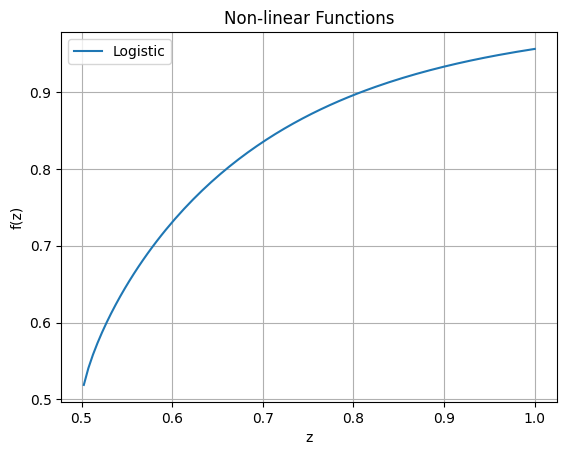

No handles with labels found to put in legend.


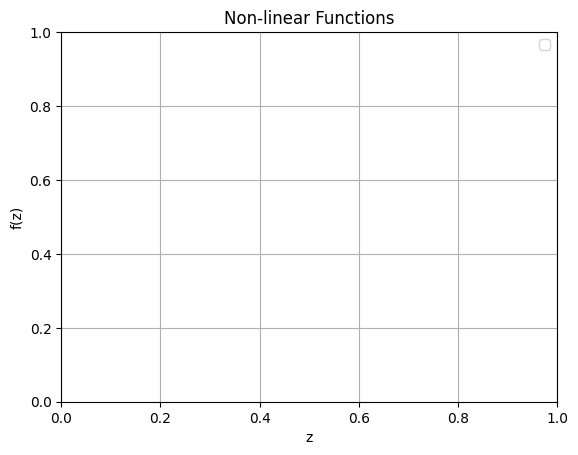

No handles with labels found to put in legend.


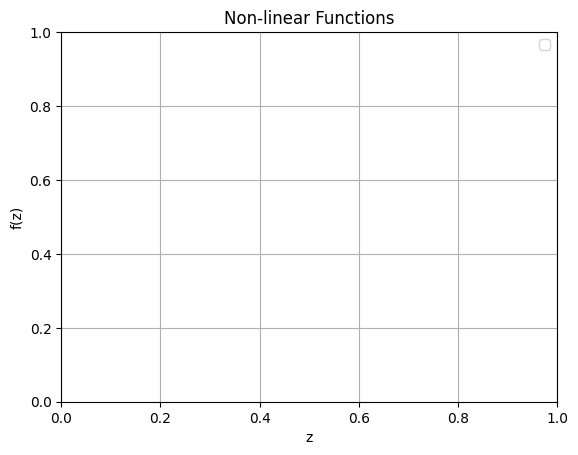

No handles with labels found to put in legend.


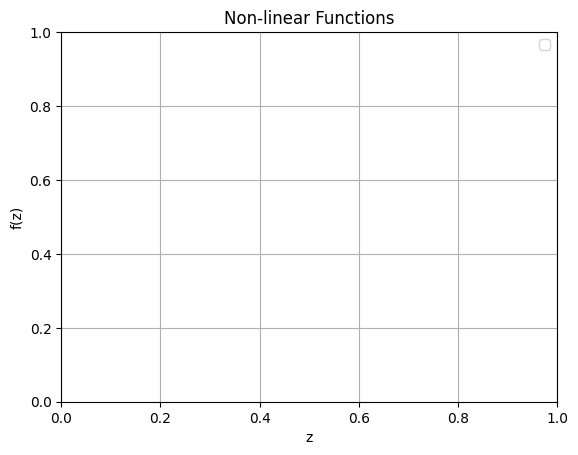

No handles with labels found to put in legend.


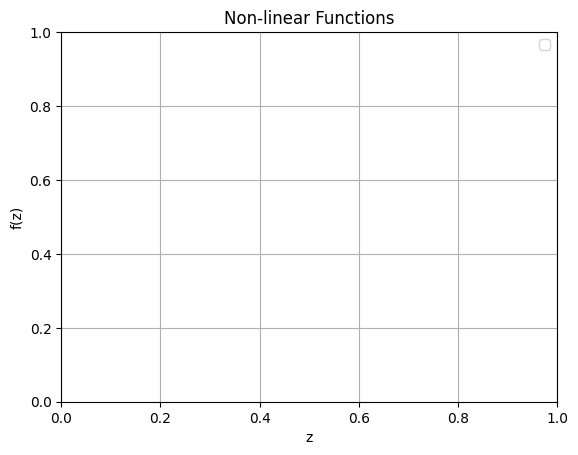

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# ... (Our function definitions from before) ...

# Parameters for plotting
z_values = np.linspace(0, 1, 200)  # Input values

# Calculate and Plot: Logistic Function
y_logistic = logistic_function(z_values)
plt.plot(z_values, y_logistic, label='Logistic')

for i in [0.1, 0.2, 0.3, 0.4, 0.5]:
    # Calculate and Plot: Generalized Logistic Function
    def logistic_function(z, k=5, alpha=i):
        return 1 / (1 + np.exp(-k * (z - 0.5)**alpha))


    # Plot Styling
    plt.xlabel('z')
    plt.ylabel('f(z)')
    plt.title('Non-linear Functions')
    plt.legend()
    plt.grid(True)
    plt.show()

In [27]:
def original_mod(z, alpha):
    omega = 2 * np.arctan(1000 * alpha - 0.25 / 2)
    return 1000 - alpha + 0.25 * np.tan(omega * (z - 0.5)) + 0.5 + alpha * z**2 

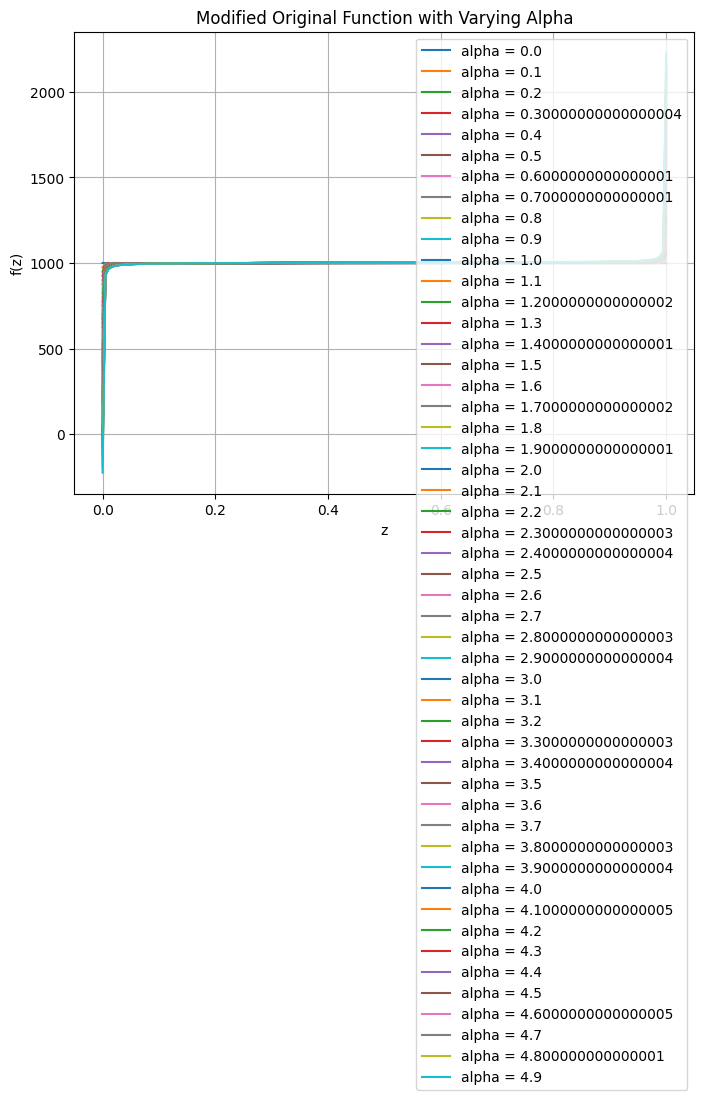

In [32]:
def linear_function(z):
    return 1000 - z + 0.5  # A simple linear function

def nonlinear_function(z):
    omega = 2 * np.arctan(999.75)  # Pre-calculated omega 
    return 1000 + 0.25 * np.tan(omega * (z - 0.5)) + 0.5  # Nonlinear variant

def interpolated_function(z, alpha):
    return (1 - alpha) * linear_function(z) + alpha * nonlinear_function(z)


# Alpha values to explore
alpha_values = np.arange(0, 5, 0.1)

# Plotting
plt.figure(figsize=(8, 6)) # Adjust figure size if needed
for alpha in alpha_values:
    y = interpolated_function(z_values, alpha)  # Or use original_mod
    plt.plot(z_values, y, label=f'alpha = {alpha}')

plt.xlabel('z')
plt.ylabel('f(z)')
plt.title('Modified Original Function with Varying Alpha')
plt.legend()
plt.grid(True)
plt.show()

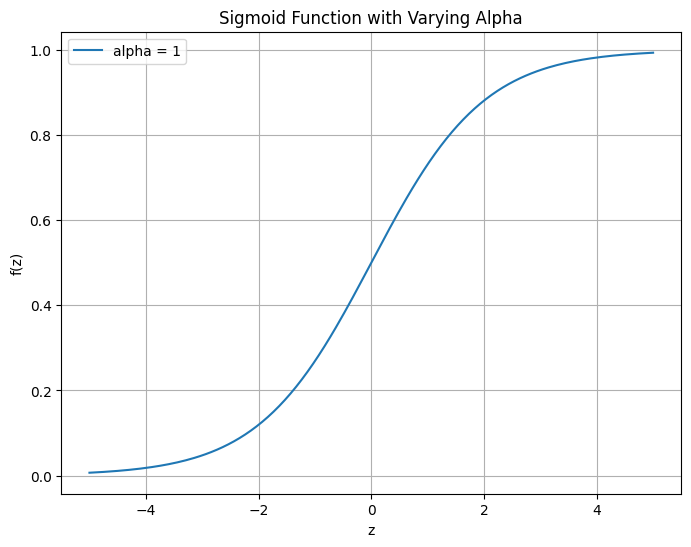

In [39]:
def sigmoid(z, alpha):
    return 1 / (1 + np.exp(-alpha * z))

# Input values
z_values = np.linspace(-5, 5, 200)  # Wider range to visualize the sigmoid

# Alpha values to explore
alpha_values = [1]  # Example values

# Plotting
plt.figure(figsize=(8, 6))
for alpha in alpha_values:
    y = sigmoid(z_values, alpha)
    plt.plot(z_values, y, label=f'alpha = {alpha}')

plt.xlabel('z')
plt.ylabel('f(z)')
plt.title('Sigmoid Function with Varying Alpha')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
z_values

array([-5.        , -4.94974874, -4.89949749, -4.84924623, -4.79899497,
       -4.74874372, -4.69849246, -4.64824121, -4.59798995, -4.54773869,
       -4.49748744, -4.44723618, -4.39698492, -4.34673367, -4.29648241,
       -4.24623116, -4.1959799 , -4.14572864, -4.09547739, -4.04522613,
       -3.99497487, -3.94472362, -3.89447236, -3.84422111, -3.79396985,
       -3.74371859, -3.69346734, -3.64321608, -3.59296482, -3.54271357,
       -3.49246231, -3.44221106, -3.3919598 , -3.34170854, -3.29145729,
       -3.24120603, -3.19095477, -3.14070352, -3.09045226, -3.04020101,
       -2.98994975, -2.93969849, -2.88944724, -2.83919598, -2.78894472,
       -2.73869347, -2.68844221, -2.63819095, -2.5879397 , -2.53768844,
       -2.48743719, -2.43718593, -2.38693467, -2.33668342, -2.28643216,
       -2.2361809 , -2.18592965, -2.13567839, -2.08542714, -2.03517588,
       -1.98492462, -1.93467337, -1.88442211, -1.83417085, -1.7839196 ,
       -1.73366834, -1.68341709, -1.63316583, -1.58291457, -1.53

In [41]:
NB_EXAMPLES = 20000
NB_FACTORS = 6
DISTRIBUTION = [np.random.uniform, {'low': 0., 'high': 1.}]

In [63]:
def get_artificial_factors_dataset(nb_examples, nb_factors, distribution, dist_kwargs):
    ''' Create artificial factors dataset using a specified distribution
        Each column is a factor and each line is a data point

    :param nb_examples:         number of examples in the dataset
    :param nb_factors:          number of generative factors
    :param distribution:        distribution of the artificial factors
    :param dist_kwargs:         additional keyword arguments for the distribution
    '''
    # initialize factors dataset
    factors = np.zeros((nb_examples, nb_factors))

    # fill array with random continuous factors values from the distribution
    for line_idx in range(0, nb_examples):
        for column_idx in range(0, nb_factors):
            factor_value = distribution(**dist_kwargs)
            factors[line_idx, column_idx] = factor_value

    return factors

# def get_factors_codes_dataset(non_linearity_strength):
#     ''' Create factors-codes dataset

#     :param non_linearity_strength:     strength of non-linearity relation between factors and codes
#     '''
#     # create factors dataset
#     dist, dist_kwargs = DISTRIBUTION
#     factors = get_artificial_factors_dataset(nb_examples=100, nb_factors=6,
#                                              distribution=dist, dist_kwargs=dist_kwargs)
#     # compute codes from continuous factors
#     alpha = non_linearity_strength * 10
#     codes = 1 / (1 + np.exp(-alpha * factors))
#     return factors, codes


def get_factors_codes_dataset(non_linearity_strength):
    ''' Create factors-codes dataset

    :param non_linearity_strength:     strength of non-linearity relation between factors and codes
    '''
    # create factors dataset
    dist, dist_kwargs = DISTRIBUTION
    factors = get_artificial_factors_dataset(nb_examples=NB_EXAMPLES, nb_factors=NB_FACTORS,
                                             distribution=dist, dist_kwargs=dist_kwargs)

    # compute codes from continuous factors
    B, C = 1000, 0.25
    omega = 2 * np.arctan(B ** (non_linearity_strength - C) / 2)
    codes = B ** (C - non_linearity_strength) * np.tan(omega * (factors - 0.5)) + 0.5

    return factors, codes

In [64]:
factors, codes = get_factors_codes_dataset(0.5)

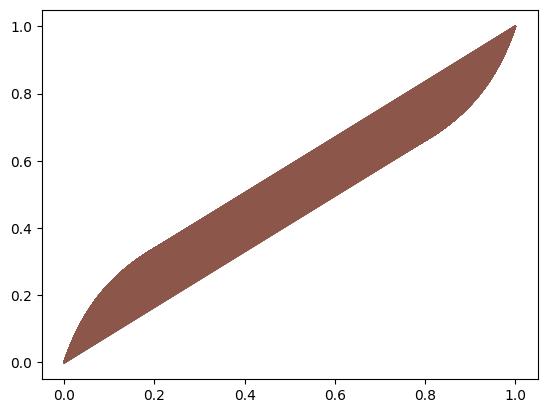

In [65]:
plt.plot(factors,codes)